In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # to loop files in a folder and take many images to prevent errors

# Load Dataset

In [2]:
# load dataset dari directory folder
folder_path = 'D:\\Kuliah\\Semester 6\\TK1\\Tugas Individu\\Mango_Leaf_Dataset'

for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        full_path = os.path.join(dirname, filename)
        print(full_path)   

D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134600.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134608.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134617.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134637.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134644.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134651.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134707.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134719.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134727.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134734.jpg
D:\Kuliah\Semester 6\TK1\Tugas Individu\Mango_Leaf_Dataset\Diseased\20241109_134741.jpg
D:\Kuliah\Semester 6\TK1\Tugas I

# Preprocessing

In [3]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

#lad dataset for healthy and diseased mango leave
healthy_img = 'D:\\Kuliah\\Semester 6\\TK1\\Tugas Individu\\Mango_Leaf_Dataset\\Healthy'
diseased_img = 'D:\\Kuliah\\Semester 6\\TK1\\Tugas Individu\\Mango_Leaf_Dataset\\Diseased'

# List of allowed image extensions
image_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

In [4]:
# Count files with specified image extensions
healthy_count = len([file for file in os.listdir(healthy_img) if file.lower().endswith(tuple(image_extensions))])
diseased_count = len([file for file in os.listdir(diseased_img) if file.lower().endswith(tuple(image_extensions))])

In [5]:
# count how many images in healthy folder and diseased folder
print(f'There are {healthy_count} of healthy images')
print(f'There are {diseased_count} of diseased images')

There are 207 of healthy images
There are 200 of diseased images


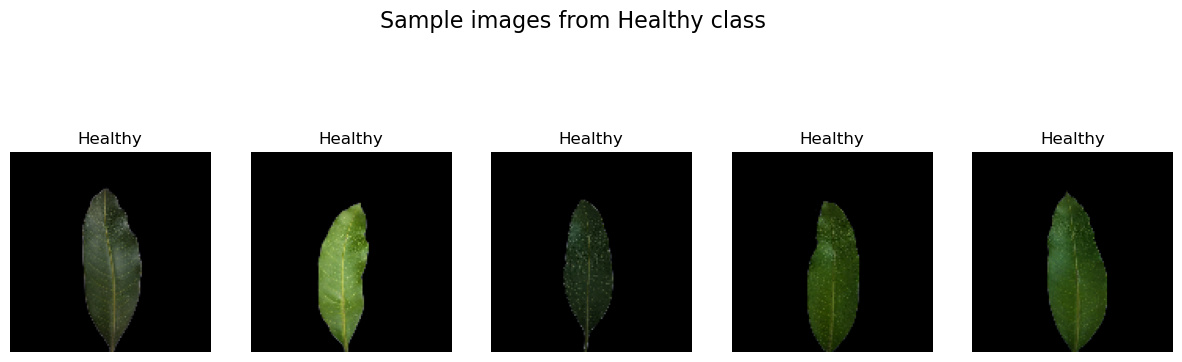

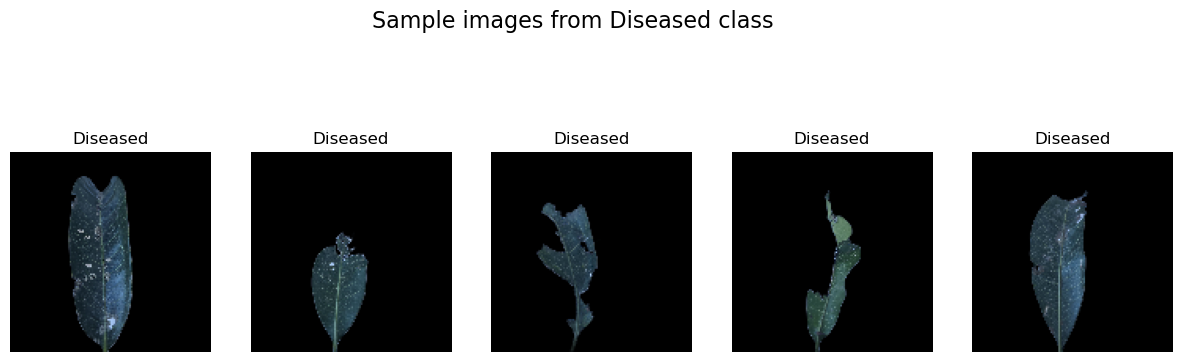

In [6]:
# Display a few samples from the main directory without subdirectories
def display_samples(dir_path, label, num_samples=5):
    plt.figure(figsize=(15, 5))

    # Get the list of images in the main directory and limit to num_samples
    images = os.listdir(dir_path)[:num_samples]

    for i, image_name in enumerate(images):
        # Construct the full path to the image
        img_path = os.path.join(dir_path, image_name)

        # Load and preprocess the image
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0  # Normalize for display

        # Plot each image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_array)
        plt.title(label)
        plt.axis('off')

    plt.suptitle(f'Sample images from {label} class', fontsize=16)
    plt.show()

# Example usage
# Replace 'healthy_img' and 'diseased_img' with the paths to your image directories
display_samples(healthy_img, 'Healthy')
display_samples(diseased_img, 'Diseased')

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Base directory for the split dataset
base_dir = 'D:\\Kuliah\\Semester 6\\TK1\\Tugas Individu\\Mango_Leaf_Dataset'
os.makedirs(base_dir, exist_ok=True)

for subset in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_dir, subset, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, subset, 'diseased'), exist_ok=True)

# Function to split images and copy them to train, val, test directories
def split_data(source_dir, train_dir, val_dir, test_dir, split_ratios=(0.6, 0.2, 0.2)):
     # Get all image file paths
    all_files = [file for file in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, file))]

    # Split the files into train, validation, and test sets
    train_files, temp_files = train_test_split(all_files, test_size=(split_ratios[1] + split_ratios[2]), random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=split_ratios[2] / (split_ratios[1] + split_ratios[2]), random_state=42)

    # Copy files to the respective directories
    for filename in train_files:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(train_dir, filename))
    for filename in val_files:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(val_dir, filename))
    for filename in test_files:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(test_dir, filename))

# Apply the split function to each class
split_data(healthy_img, os.path.join(base_dir, 'train', 'healthy'), os.path.join(base_dir, 'val', 'healthy'), os.path.join(base_dir, 'test', 'healthy'))
split_data(diseased_img, os.path.join(base_dir, 'train', 'diseased'), os.path.join(base_dir, 'val', 'diseased'), os.path.join(base_dir, 'test', 'diseased'))

##############################################################################################################

# Set up ImageDataGenerators for train, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for evaluation
)

Found 244 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [9]:
print('Training images: ', train_generator.n)
print('Testing images: ', test_generator.n)
print('Validation images: ', val_generator.n)


Training images:  244
Testing images:  82
Validation images:  81


In [11]:
print(train_generator.class_indices)
print(val_generator.class_indices)

{'diseased': 0, 'healthy': 1}
{'diseased': 0, 'healthy': 1}


In [13]:
# check data imbalance
def count_images(folder_path):
    healthy_path = os.path.join(folder_path, 'Healthy')
    diseased_path = os.path.join(folder_path, 'Diseased')
    healthy_count = len(os.listdir(healthy_path))
    diseased_count = len(os.listdir(diseased_path))
    return healthy_count, diseased_count

train_healthy, train_diseased = count_images(os.path.join(base_dir, 'train'))
val_healthy, val_diseased = count_images(os.path.join(base_dir, 'val'))

print(f"Train - Healthy: {train_healthy}, Diseased: {train_diseased}")
print(f"Val - Healthy: {val_healthy}, Diseased: {val_diseased}")

Train - Healthy: 124, Diseased: 120
Val - Healthy: 41, Diseased: 40


# Model CNN 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Membangun model CNN
model_cnn = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape =(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#compile model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks: Early stopping and best model checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_mango_leaf_classifier.h5', monitor='val_accuracy', save_best_only=True)

#train model
history = model_cnn.fit(train_generator, epochs=20, validation_data=val_generator)

# save model
# ini supaya kita tidak perlu me-rerun lagi. 
# Penggunaan save model juga untuk lebih efisien saat run.
model_cnn.save('mango_leaf_classifier.h5')

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 112s 14s/step - accuracy: 0.5515 - loss: 0.6580 - val_accuracy: 0.8148 - val_loss: 0.3426
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 92s 12s/step - accuracy: 0.8878 - loss: 0.3490 - val_accuracy: 0.9259 - val_loss: 0.2763
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 86s 11s/step - accuracy: 0.9439 - loss: 0.2598 - val_accuracy: 0.9753 - val_loss: 0.1722
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 87s 11s/step - accuracy: 0.9652 - loss: 0.1568 - val_accuracy: 0.9630 - val_loss: 0.2351
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 87s 12s/step - accuracy: 0.9450 - loss: 0.2503 - val_accuracy: 0.8642 - val_loss: 0.3456
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 88s 11s/step - accuracy: 0.9235 - loss: 0.2373 - val_accuracy: 0.8889 - val_loss: 0.3077
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 88s 11s/step - accuracy: 0.9065 - loss: 0.1873 - val_accuracy: 0.9753 - val_loss: 0.1434
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 86s 11s/step - accuracy: 0.9598 - loss: 0.1400 - val_accuracy: 0.9753 - val_loss: 0.1747

# Evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# load finished model

model_finished = tf.keras.models.load_model('mango_leaf_classifier.h5')

In [16]:
# evaluate model on test set

test_loss, test_acc = model_finished.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 0.9939 - loss: 0.0177
Test Accuracy: 0.99
Test Loss: 0.03


In [18]:
# Predictions and Classification report

y_true = test_generator.classes
y_pred = (model_finished.predict(test_generator) > 0.5).astype("int32").flatten()

print(classification_report(y_true, y_pred, target_names=['Healthy', 'Diseased']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 16s/step
              precision    recall  f1-score   support

     Healthy       0.98      1.00      0.99        40
    Diseased       1.00      0.98      0.99        42

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82



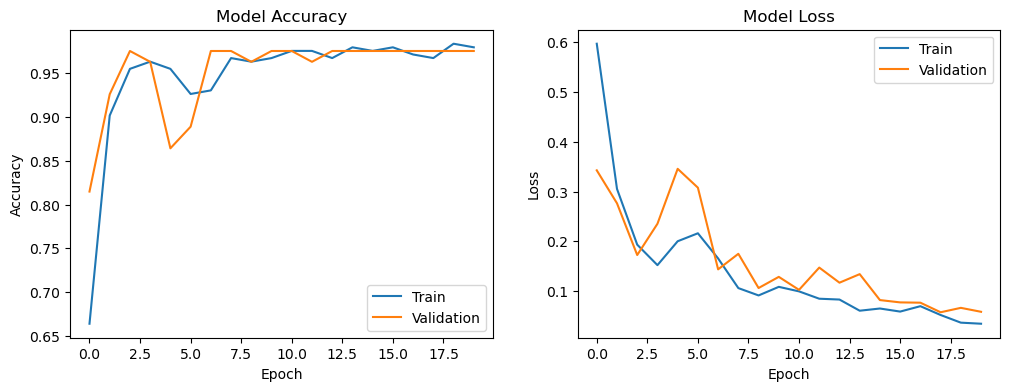

In [19]:
# Plot training & validation accuracy and loss
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the plotting function
plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


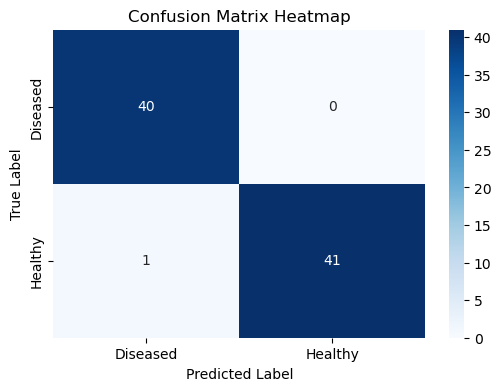

In [21]:
def plot_confusion_matrix(model, generator):
    # Reset the generator to start from the beginning
    generator.reset()

    # Initialize arrays to hold true labels and predictions
    true_labels = []
    predictions = []

    # Loop through all batches in the generator
    for _ in range(len(generator)):
        # Get a batch of images and labels
        img_batch, label_batch = next(generator)

        # Predict on the batch of images
        preds = model.predict(img_batch)

        # Append true labels and predictions
        true_labels.extend(label_batch)
        predictions.extend(preds > 0.5)  # Assuming binary classification threshold at 0.5

    # Convert lists to numpy arrays for consistency
    true_labels = np.array(true_labels).astype(int)
    predictions = np.array(predictions).astype(int)

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predictions)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Diseased', 'Healthy'], yticklabels=['Diseased', 'Healthy'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix Heatmap")
    plt.show()

# Call the function
plot_confusion_matrix(model_finished, test_generator)

Total images in test set: 82
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/s

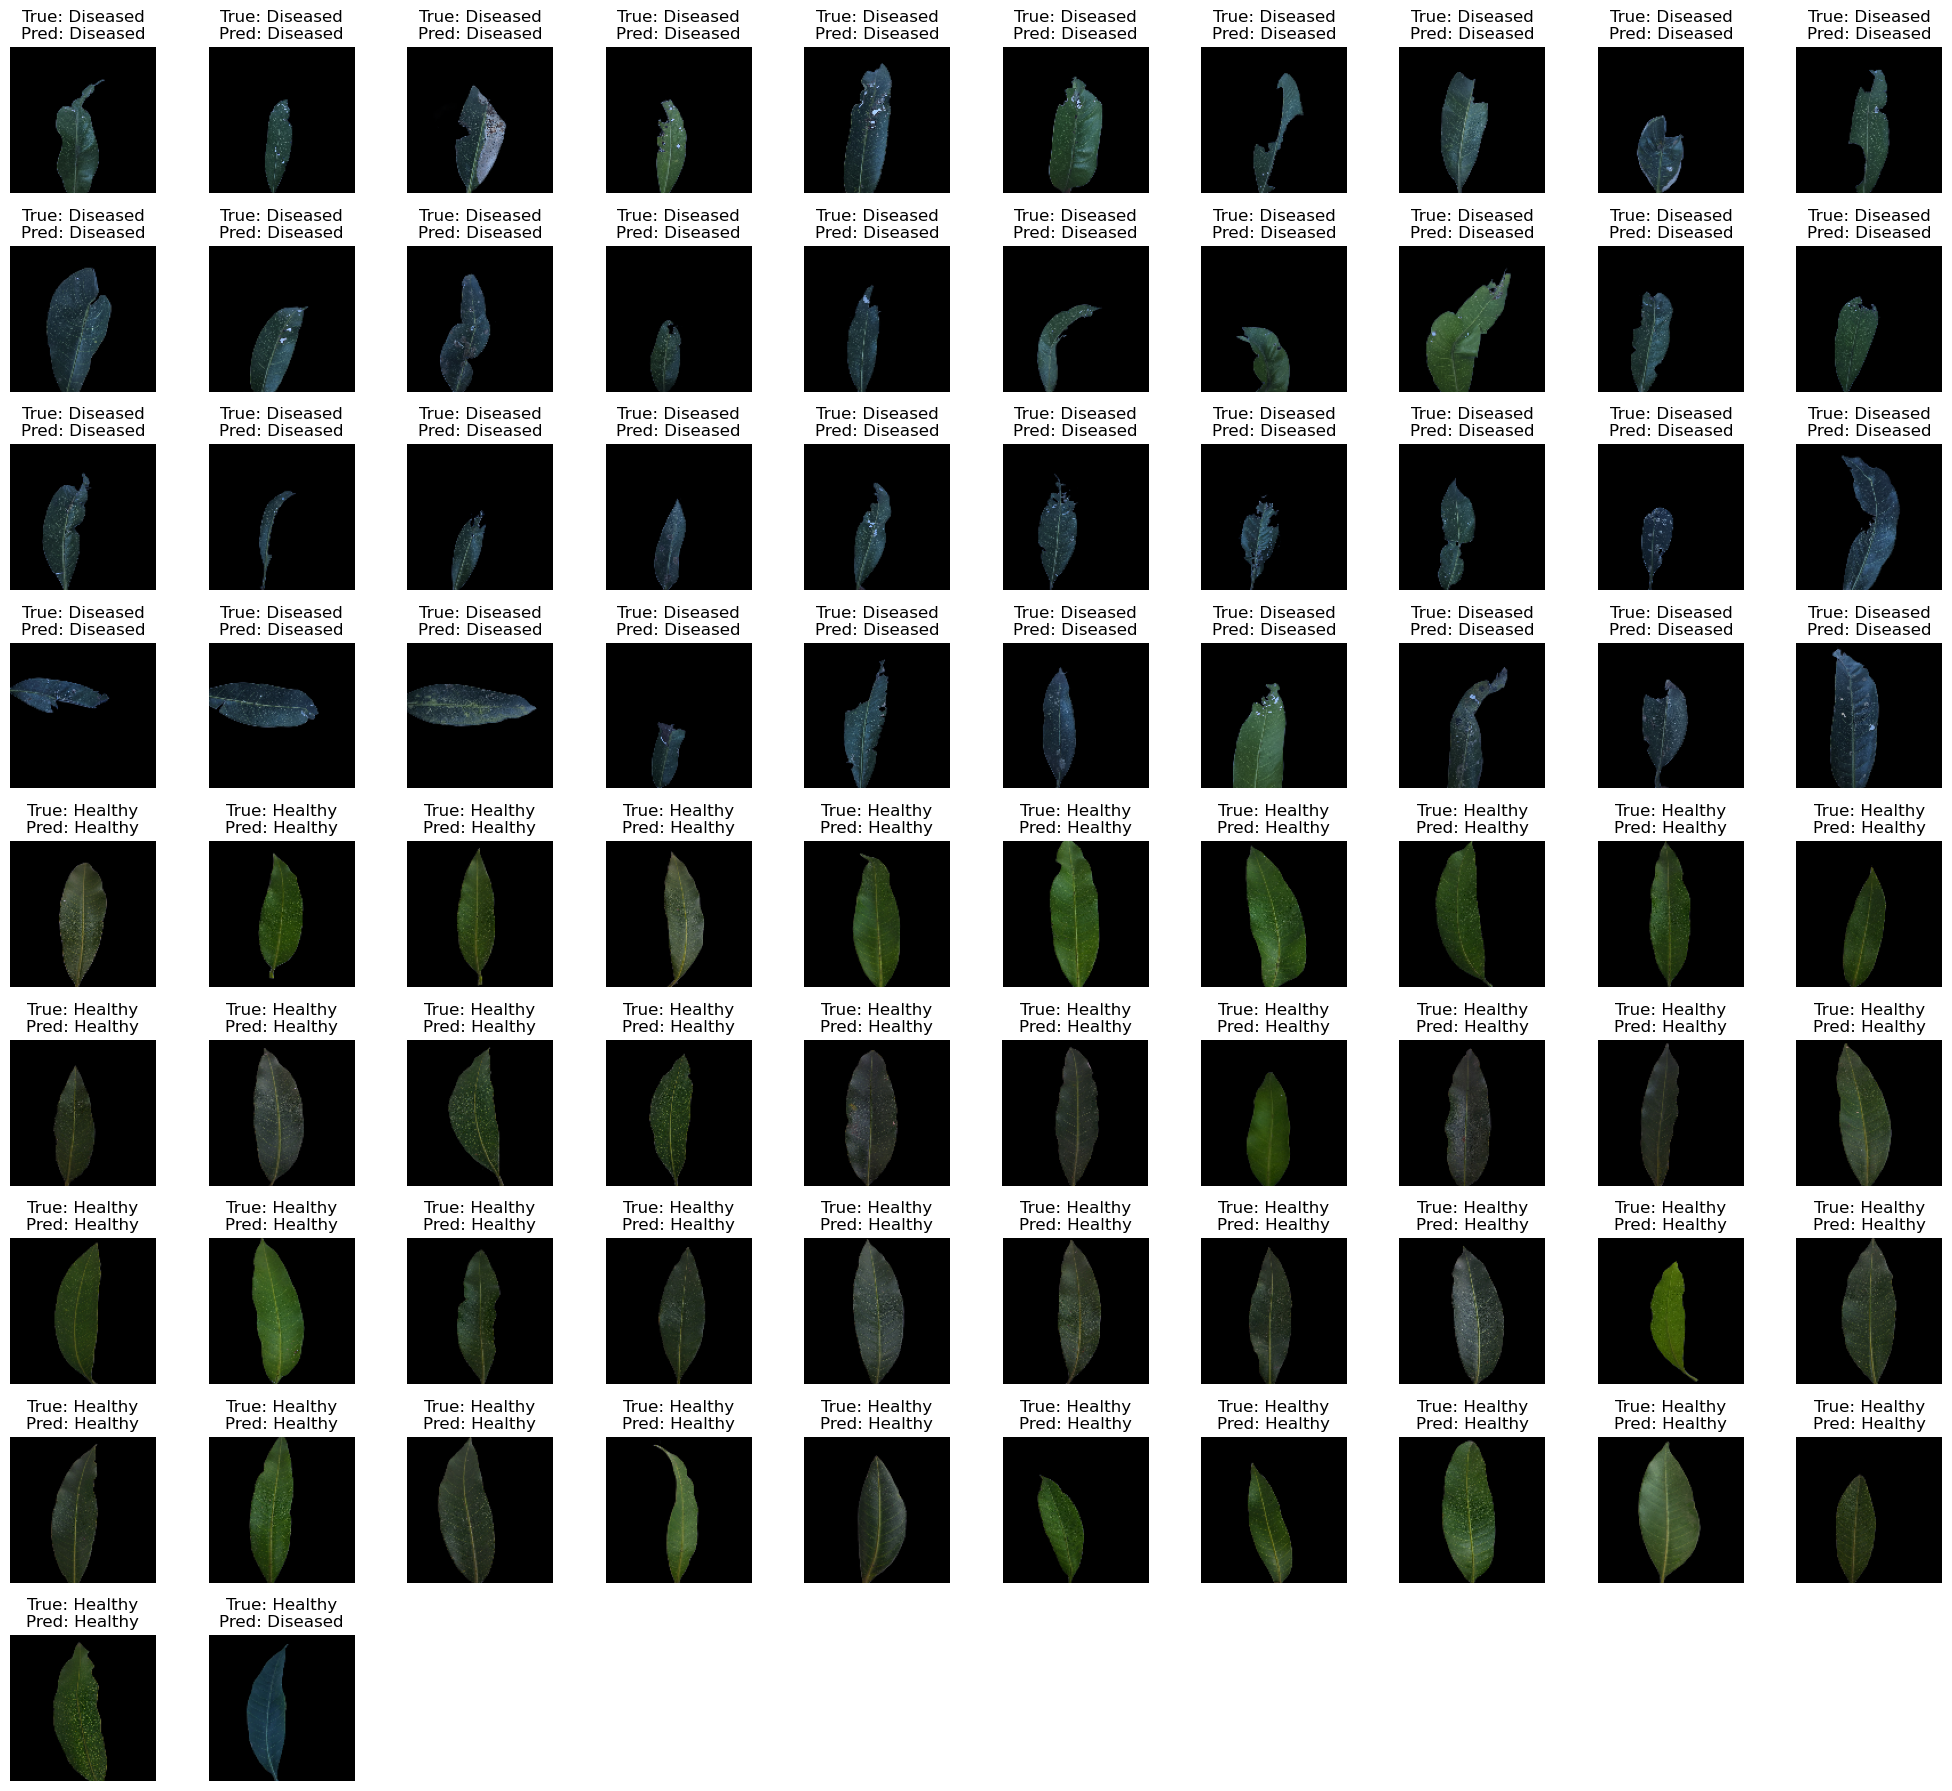

In [23]:
# visualize the predictios
def visualize_all_predictions(model, generator):
    # Reset the generator to start from the beginning
    generator.reset()

    # Get the total number of images in the generator
    total_images = generator.samples
    print(f"Total images in test set: {total_images}")

    # Calculate the number of rows and columns needed for the grid
    grid_size = int(np.ceil(np.sqrt(total_images)))  # Square grid
    plt.figure(figsize=(grid_size * 2, grid_size * 2))  # Adjust the figure size as needed

    image_index = 0

    # Iterate over batches
    for img_batch, label_batch in generator:
        batch_size = img_batch.shape[0]

        # Loop over each image in the batch
        for i in range(batch_size):
            if image_index >= total_images:
                break

            # Get image, true label, and prediction
            img = img_batch[i]
            label = label_batch[i]
            prediction = model.predict(np.expand_dims(img, axis=0))[0][0]

            true_label = 'Healthy' if label == 1 else 'Diseased'
            pred_label = 'Healthy' if prediction > 0.5 else 'Diseased'

            # Plot each image in a grid
            plt.subplot(grid_size, grid_size, image_index + 1)
            plt.imshow(img)
            plt.title(f"True: {true_label}\nPred: {pred_label}")
            plt.axis('off')

            image_index += 1

        # Stop if we have reached the total number of images
        if image_index >= total_images:
            break

    plt.tight_layout()
    plt.show()

# Call the function to visualize all test images together
visualize_all_predictions(model_finished, test_generator)